In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

# PRE-PROCESSING

## Upload data

In [2]:
pd.set_option('display.max_columns',40)
data = pd.read_csv(r'credit_score.csv')
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


## Describe all columns

In [3]:
data.describe(include='all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,77583,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,NaN,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,NaN,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


## Look categorical and numerical columns

In [4]:
cat = (data.dtypes == 'object')
categorical_cols = list(cat[cat].index)

categorical_cols

['ID',
 'CustomerID',
 'Month',
 'Name',
 'SSN',
 'Occupation',
 'TypeofLoan',
 'PaymentofMinAmount',
 'PaymentBehaviour',
 'CreditScore']

In [5]:
num = (data.dtypes == 'int64')
numerical_cols = list(num[num].index)

numerical_cols

['Age',
 'NumBankAccounts',
 'NumCreditCard',
 'InterestRate',
 'NumofLoan',
 'Delayfromduedate']

## Create new column name is 'Score' with binary values

In [6]:
data['score'] = np.where(data['CreditScore']!='Poor',0,1)
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


## Where uniqe is too many drop that columns

In [7]:
for i in data[['ID', 'CustomerID', 'Name', 'TypeofLoan', 'SSN']]:
    data.drop(i,axis=1,inplace=True)

## Look value_counts of dependent

In [73]:
data.score.value_counts()

0    62145
1    25350
Name: score, dtype: int64

## Look if there is missing value

In [8]:
data.isnull().sum()

Month                         0
Age                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
CreditScore                   0
score                         0
dtype: int64

## Fill missing values with average for numeric and mode for categorical of each columns

In [9]:
for i in data[['MonthlyInhandSalary','NumofDelayedPayment','ChangedCreditLimit','NumCreditInquiries','Amountinvestedmonthly','MonthlyBalance','Occupation']]:
    if data[i].dtype == 'object':
        mode = data[i].mode()[0]
        data[i].fillna(mode, inplace=True)
    else:
        mean = data[i].mean()
        data[i].fillna(mean, inplace=True)

In [10]:
data.isnull().sum()

Month                     0
Age                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
CreditScore               0
score                     0
dtype: int64

## Look correlation

In [11]:
corr = data.corr()['score']

high_corr_feats = corr[abs(corr) > 0.01].index.tolist()

high_corr_feats

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1222/4092161349.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['score']


['MonthlyInhandSalary',
 'Delayfromduedate',
 'ChangedCreditLimit',
 'OutstandingDebt',
 'CreditUtilizationRatio',
 'Amountinvestedmonthly',
 'MonthlyBalance',
 'score']

In [12]:
data = data[['MonthlyInhandSalary','Delayfromduedate','ChangedCreditLimit','OutstandingDebt','CreditUtilizationRatio','Amountinvestedmonthly',
'MonthlyBalance','Occupation','Month','PaymentofMinAmount','PaymentBehaviour','score']]

data

,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
0,1824.843333,3,11.270000,809.98,26.822620,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,4193.181285,-1,11.270000,809.98,31.944960,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,4193.181285,3,10.385851,809.98,28.609352,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,4193.181285,5,6.270000,809.98,31.377862,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,1824.843333,6,11.270000,809.98,24.797347,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87490,3359.415833,20,9.500000,502.38,39.323569,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,3359.415833,23,11.500000,502.38,34.663572,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,3359.415833,18,11.500000,502.38,40.565631,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,3359.415833,27,11.500000,502.38,41.255522,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


## Use variance_infilation_factor to measure multicollinearity beetwen the independent variables

## The columns with vif higher than 5 are removed

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[[#'MonthlyInhandSalary',
                  'Delayfromduedate',
                  'ChangedCreditLimit',
                  'OutstandingDebt',
                  #'CreditUtilizationRatio',
                  'Amountinvestedmonthly',
                  'MonthlyBalance']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,4.050698,Delayfromduedate
1,3.772889,ChangedCreditLimit
2,4.342809,OutstandingDebt
3,1.749134,Amountinvestedmonthly
4,2.389092,MonthlyBalance


In [18]:
data = data[['Delayfromduedate',
             'ChangedCreditLimit',
             'OutstandingDebt',
             'Amountinvestedmonthly',
             'MonthlyBalance',
             'Occupation',
             'Month',
             'PaymentofMinAmount',
             'PaymentBehaviour',
             'score']]

data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
0,3,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,-1,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,3,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,5,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,6,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...
87490,20,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,23,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,18,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,27,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


## Find out if there is Outlier

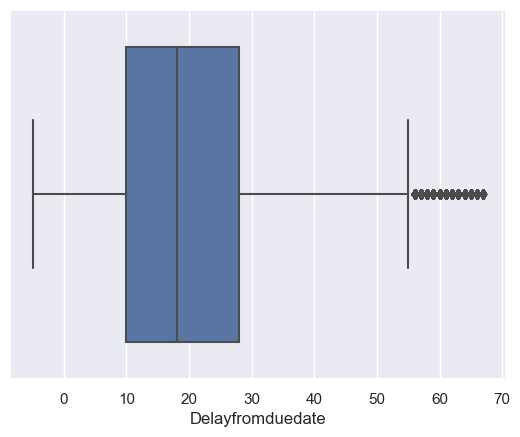

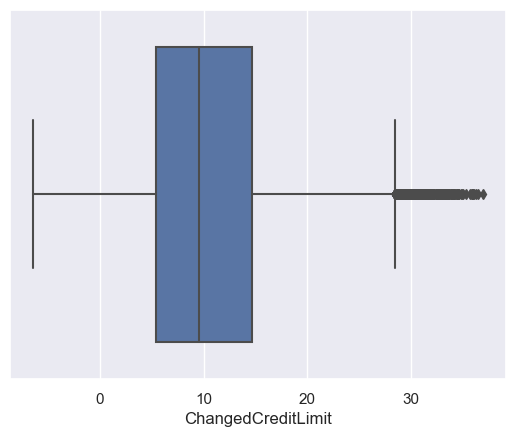

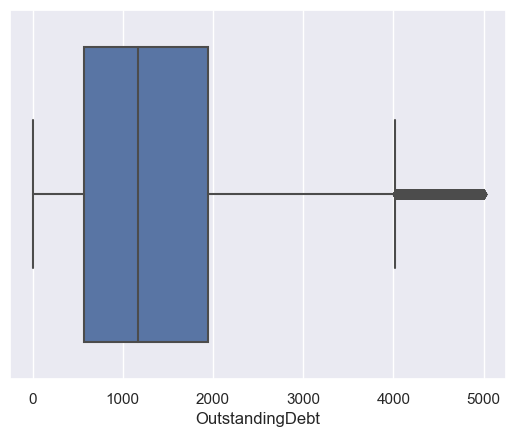

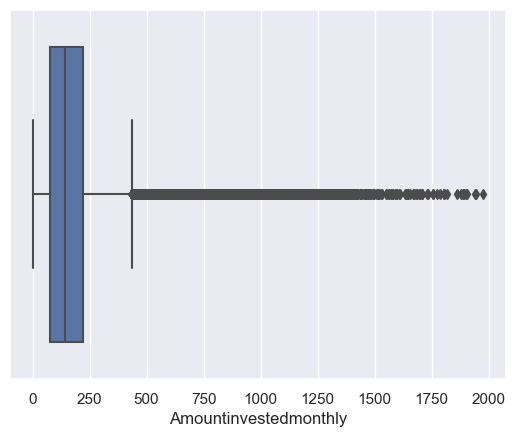

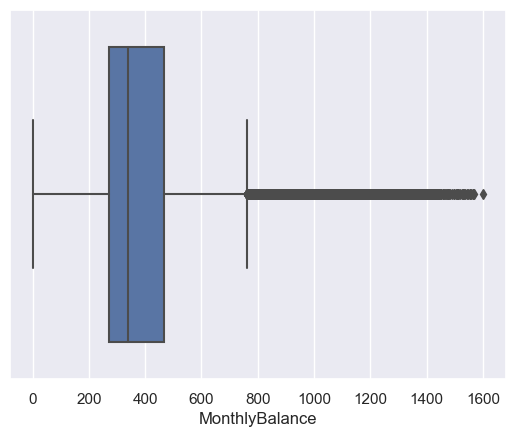

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## Outlier treatment

In [20]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1222/3326136409.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1222/3326136409.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


In [21]:
for i in data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1222/1196502253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1222/1196502253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


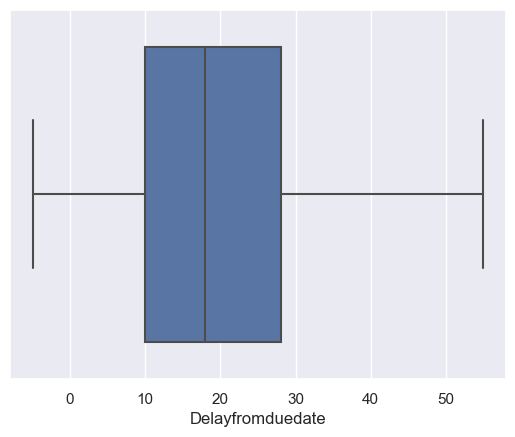

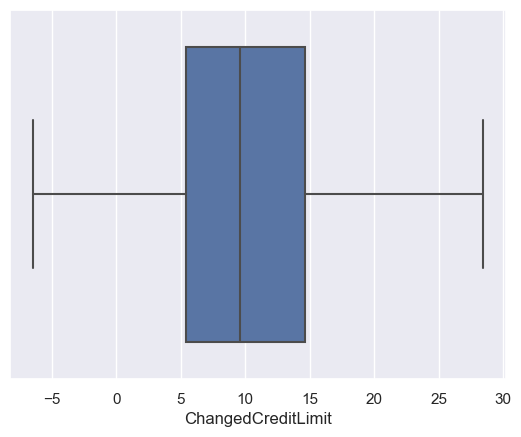

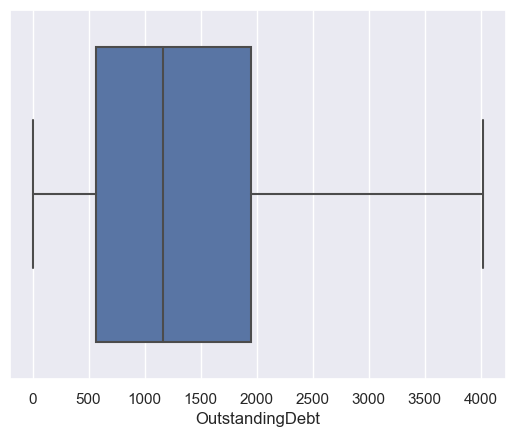

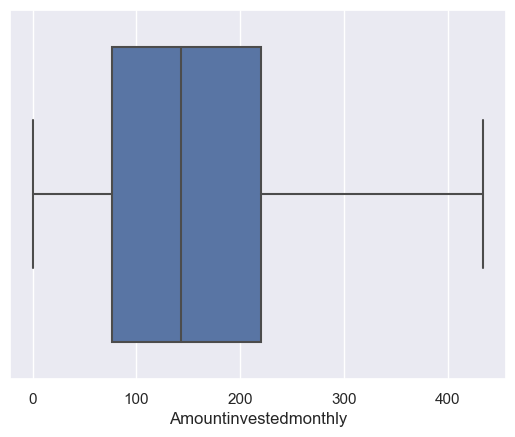

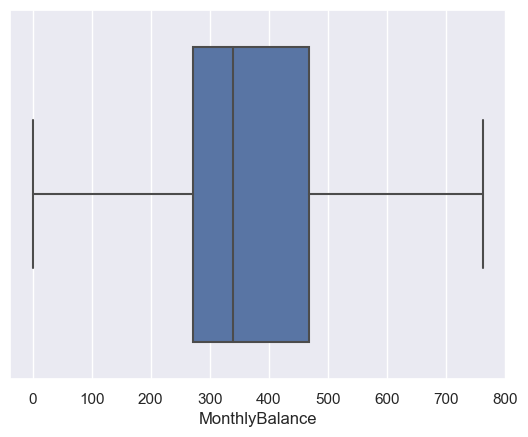

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## Look data columns 

In [23]:
data.columns

Index(['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt',
       'Amountinvestedmonthly', 'MonthlyBalance', 'Occupation', 'Month',
       'PaymentofMinAmount', 'PaymentBehaviour', 'score'],
      dtype='object')

### Look categorical columns

In [74]:
cat = (data.dtypes == 'object')
categorical_cols = list(cat[cat].index)

categorical_cols

['Occupation', 'Month', 'PaymentofMinAmount', 'PaymentBehaviour']

# MODELLING

## First we are going to built Catboost model with categorical data include

## Inputs and output

In [24]:
inputs = data[['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt',
       'Amountinvestedmonthly', 'MonthlyBalance', 'Occupation', 'Month',
       'PaymentofMinAmount', 'PaymentBehaviour']]
output = data['score']

## Train test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

## Create function to measure confusion matrix,classification report and gini

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)

## Catboost model

## Fit our model

In [30]:
from catboost import CatBoostClassifier

In [31]:
catboost_model = CatBoostClassifier(cat_features=['Occupation', 'Month', 'PaymentofMinAmount', 'PaymentBehaviour'])

catboost_model.fit(X_train, y_train)

Learning rate set to 0.059706
0:	learn: 0.6625727	total: 79.4ms	remaining: 1m 19s
1:	learn: 0.6350748	total: 98.9ms	remaining: 49.4s
2:	learn: 0.6119453	total: 121ms	remaining: 40.3s
3:	learn: 0.5917333	total: 142ms	remaining: 35.5s
4:	learn: 0.5739371	total: 160ms	remaining: 31.7s
5:	learn: 0.5579238	total: 178ms	remaining: 29.5s
6:	learn: 0.5447395	total: 195ms	remaining: 27.7s
7:	learn: 0.5318223	total: 214ms	remaining: 26.6s
8:	learn: 0.5205918	total: 235ms	remaining: 25.9s
9:	learn: 0.5114971	total: 255ms	remaining: 25.3s
10:	learn: 0.5031013	total: 275ms	remaining: 24.8s
11:	learn: 0.4960216	total: 295ms	remaining: 24.3s
12:	learn: 0.4897142	total: 315ms	remaining: 23.9s
13:	learn: 0.4840896	total: 333ms	remaining: 23.4s
14:	learn: 0.4796835	total: 354ms	remaining: 23.2s
15:	learn: 0.4754723	total: 373ms	remaining: 22.9s
16:	learn: 0.4717017	total: 393ms	remaining: 22.7s
17:	learn: 0.4685913	total: 412ms	remaining: 22.5s
18:	learn: 0.4661834	total: 433ms	remaining: 22.3s
19:	lear

## Look our model's performance

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_catboost = evaluate(catboost_model, X_test, y_test)

Model Performance
Gini prob is 70.2806997662119
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     18596
           1       0.72      0.58      0.64      7653

    accuracy                           0.81     26249
   macro avg       0.78      0.74      0.76     26249
weighted avg       0.80      0.81      0.80     26249

[[16821  1775]
 [ 3185  4468]]


## Create roc curve graph

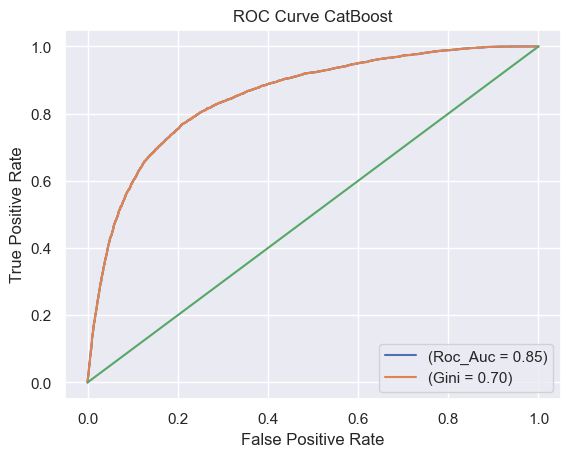

In [33]:
y_prob = catboost_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

## Now we are going to conversion our data with dumies method:

In [35]:
new_data = data.copy()
#data

In [36]:
new_data.describe(include='all')

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
count,87495.000000,87495.000000,87495.000000,87495.000000,87495.000000,87495,87495,87495,87495,87495.000000
unique,NaN,NaN,NaN,NaN,NaN,15,8,3,7,NaN
top,NaN,NaN,NaN,NaN,NaN,Lawyer,January,Yes,LowspentSmallvaluepayments,NaN
freq,NaN,NaN,NaN,NaN,NaN,11940,10970,45810,22237,NaN
mean,20.887228,10.369890,1400.498980,173.106721,387.826475,NaN,NaN,NaN,NaN,0.289731
std,14.428935,6.658361,1087.207412,121.518374,172.647850,NaN,NaN,NaN,NaN,0.453640
min,-5.000000,-6.490000,0.230000,0.000000,0.007760,NaN,NaN,NaN,NaN,0.000000
25%,10.000000,5.425000,566.400000,76.962414,270.918218,NaN,NaN,NaN,NaN,0.000000
50%,18.000000,9.560000,1166.230000,143.312984,338.590600,NaN,NaN,NaN,NaN,0.000000
75%,28.000000,14.640000,1948.980000,219.931271,467.662120,NaN,NaN,NaN,NaN,1.000000


In [37]:
new_data = pd.get_dummies(new_data, drop_first=True)

In [39]:
#new_data

In [40]:
new_data.columns

Index(['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt',
       'Amountinvestedmonthly', 'MonthlyBalance', 'score',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_MediaManager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Month_August', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'PaymentofMinAmount_No',
       'PaymentofMinAmount_Yes',
       'PaymentBehaviour_HighspentMediumvaluepayments',
       'PaymentBehaviour_HighspentSmallvaluepayments',
       'PaymentBehaviour_LowspentLargevaluepayments',
       'PaymentBehaviour_LowspentMediumvaluepayments',
       'PaymentBehaviour_LowspentSmallvaluepayments',
       'PaymentBehaviour_other'],
      dtype='object')

In [41]:
inputs = new_data.drop('score', axis=1)
output = new_data['score']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

## Catboost model after conversion

In [49]:
catboost_conver = CatBoostClassifier()
catboost_conver.fit(X_train,y_train)

Learning rate set to 0.059706
0:	learn: 0.6627174	total: 7.52ms	remaining: 7.52s
1:	learn: 0.6347779	total: 14.6ms	remaining: 7.26s
2:	learn: 0.6107521	total: 20.5ms	remaining: 6.81s
3:	learn: 0.5905279	total: 25.8ms	remaining: 6.41s
4:	learn: 0.5718053	total: 32.3ms	remaining: 6.42s
5:	learn: 0.5566087	total: 38.5ms	remaining: 6.37s
6:	learn: 0.5434216	total: 44.4ms	remaining: 6.3s
7:	learn: 0.5308704	total: 50.2ms	remaining: 6.23s
8:	learn: 0.5204483	total: 56.1ms	remaining: 6.18s
9:	learn: 0.5114281	total: 62.1ms	remaining: 6.15s
10:	learn: 0.5041244	total: 68.9ms	remaining: 6.2s
11:	learn: 0.4957279	total: 75.4ms	remaining: 6.21s
12:	learn: 0.4900895	total: 82ms	remaining: 6.22s
13:	learn: 0.4837238	total: 88.3ms	remaining: 6.21s
14:	learn: 0.4792070	total: 94.8ms	remaining: 6.23s
15:	learn: 0.4746696	total: 102ms	remaining: 6.25s
16:	learn: 0.4708970	total: 109ms	remaining: 6.28s
17:	learn: 0.4670899	total: 114ms	remaining: 6.24s
18:	learn: 0.4638208	total: 121ms	remaining: 6.26s


In [50]:
result = evaluate(catboost_conver, X_test, y_test)

Model Performance
Gini prob is 71.63450186356779
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     18596
           1       0.72      0.60      0.65      7653

    accuracy                           0.81     26249
   macro avg       0.78      0.75      0.76     26249
weighted avg       0.81      0.81      0.81     26249

[[16805  1791]
 [ 3070  4583]]


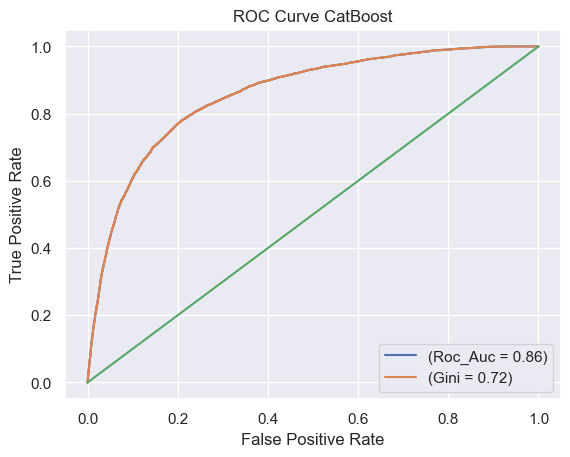

In [51]:
y_prob = catboost_conver.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

## XCB Model

## Fit our model

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Look our model's performance

In [47]:
result = evaluate(xgb_model, X_test, y_test)

Model Performance
Gini prob is 73.64431475859064
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     18596
           1       0.73      0.61      0.66      7653

    accuracy                           0.82     26249
   macro avg       0.79      0.76      0.77     26249
weighted avg       0.81      0.82      0.81     26249

[[16841  1755]
 [ 3007  4646]]


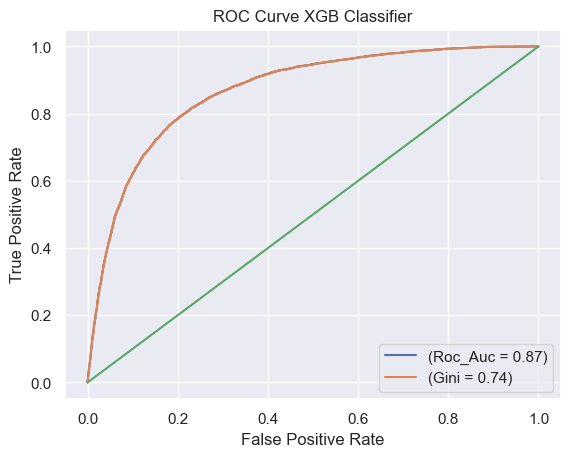

In [48]:
y_prob = xgb_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier')

plt.legend(loc='lower right')
plt.show()

# Hyperparameter tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV

## Optimized_Catboost_model

In [55]:
param_distributions = {
    'iterations': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7)}

In [57]:
random_search_catboost = RandomizedSearchCV(catboost_conver,
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_catboost.fit(X_train, y_train)

0:	learn: 0.6438759	total: 69.2ms	remaining: 34.5s
1:	learn: 0.6041208	total: 86.1ms	remaining: 21.4s
2:	learn: 0.5726099	total: 98.4ms	remaining: 16.3s
3:	learn: 0.5463249	total: 116ms	remaining: 14.4s
4:	learn: 0.5252235	total: 126ms	remaining: 12.5s
5:	learn: 0.5099597	total: 141ms	remaining: 11.6s
6:	learn: 0.4974258	total: 152ms	remaining: 10.7s
7:	learn: 0.4859524	total: 167ms	remaining: 10.3s
8:	learn: 0.4784033	total: 175ms	remaining: 9.54s
9:	learn: 0.4723094	total: 183ms	remaining: 8.96s
10:	learn: 0.4665432	total: 194ms	remaining: 8.64s
11:	learn: 0.4611482	total: 202ms	remaining: 8.22s
12:	learn: 0.4569708	total: 219ms	remaining: 8.21s
13:	learn: 0.4538148	total: 241ms	remaining: 8.36s
14:	learn: 0.4512162	total: 249ms	remaining: 8.07s
15:	learn: 0.4488731	total: 262ms	remaining: 7.92s
16:	learn: 0.4474609	total: 272ms	remaining: 7.73s
17:	learn: 0.4456608	total: 279ms	remaining: 7.48s
18:	learn: 0.4446517	total: 291ms	remaining: 7.36s
19:	learn: 0.4437101	total: 300ms	rema

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x14762e740>,
                   n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [58]:
optimized_model_catboost = random_search_catboost.best_estimator_
optmized_accuracy_catboost = evaluate(optimized_model_catboost, X_test, y_test)

Model Performance
Gini prob is 69.93747427716572
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     18596
           1       0.71      0.59      0.64      7653

    accuracy                           0.81     26249
   macro avg       0.78      0.75      0.76     26249
weighted avg       0.80      0.81      0.81     26249

[[16803  1793]
 [ 3164  4489]]


## Optimized_XCB

In [59]:
param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'subsample': np.linspace(0.5, 1, num=6), 
    'colsample_bytree': np.linspace(0.5, 1, num=6), 
    'gamma': [0, 1, 5], 
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5]}

In [60]:
random_search_xgb = RandomizedSearchCV(xgb_model,
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42)

In [61]:
print("Best Hyperparameters for XGB: ", random_search_xgb.best_params_)

Best Hyperparameters for XGB:  {'subsample': 0.9, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}


In [62]:
optimized_model_xgb = random_search_xgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_model_xgb, X_test, y_test)

Model Performance
Gini prob is 74.26957760825921
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     18596
           1       0.73      0.61      0.66      7653

    accuracy                           0.82     26249
   macro avg       0.79      0.76      0.77     26249
weighted avg       0.81      0.82      0.82     26249

[[16859  1737]
 [ 2979  4674]]


# STACKING MODEL

## The concept behind it is simple: Multiple machine learning models are combined to obtain a more accurate model

In [65]:
from mlxtend.classifier import StackingCVClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

## First we choose base models

In [66]:
base_classifiers = [
    RandomForestClassifier(),
    XGBClassifier(),
    LogisticRegression()
]

## And meta model

In [67]:
meta_classifier = CatBoostClassifier()

## Fit our model

In [68]:
stacking_model = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [69]:
stacking_model.fit(X_train, y_train)

Fitting 3 classifiers...
Fitting classifier1: randomforestclassifier (1/3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: xgbclassifier (2/3)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: logisticregression (3/3)


/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Learning rate set to 0.059706
0:	learn: 0.6528640	total: 6.04ms	remaining: 6.04s
1:	learn: 0.6162196	total: 13.2ms	remaining: 6.58s
2:	learn: 0.5882675	total: 20.1ms	remaining: 6.69s
3:	learn: 0.5638983	total: 27ms	remaining: 6.72s
4:	learn: 0.5436675	total: 34.3ms	remaining: 6.82s
5:	learn: 0.5265042	total: 40.3ms	remaining: 6.67s
6:	learn: 0.5101203	total: 47.5ms	remaining: 6.73s
7:	learn: 0.4972624	total: 54ms	remaining: 6.69s
8:	learn: 0.4863344	total: 60.8ms	remaining: 6.7s
9:	learn: 0.4760143	total: 68ms	remaining: 6.74s
10:	learn: 0.4678986	total: 75ms	remaining: 6.74s
11:	learn: 0.4599485	total: 82ms	remaining: 6.75s
12:	learn: 0.4536836	total: 89ms	remaining: 6.75s
13:	learn: 0.4474162	total: 96.2ms	remaining: 6.78s
14:	learn: 0.4434803	total: 103ms	remaining: 6.76s
15:	learn: 0.4386122	total: 110ms	remaining: 6.74s
16:	learn: 0.4344456	total: 116ms	remaining: 6.71s
17:	learn: 0.4311842	total: 124ms	remaining: 6.74s
18:	learn: 0.4275816	total: 131ms	remaining: 6.74s
19:	learn:

StackingCVClassifier(classifiers=[RandomForestClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_const...
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=100, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...),
                                  LogisticRegression()],
                     cv=5,
                     meta_classifier=<catboost.core.CatBoostClassifier object at 0x16b16bbb0>,
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

## Look our stacking models performance

In [70]:
result = evaluate(stacking_model, X_test, y_test)

Model Performance
Gini prob is 74.47117169251112
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     18596
           1       0.72      0.64      0.68      7653

    accuracy                           0.82     26249
   macro avg       0.79      0.77      0.78     26249
weighted avg       0.82      0.82      0.82     26249

[[16693  1903]
 [ 2718  4935]]


## Create roc curve graph

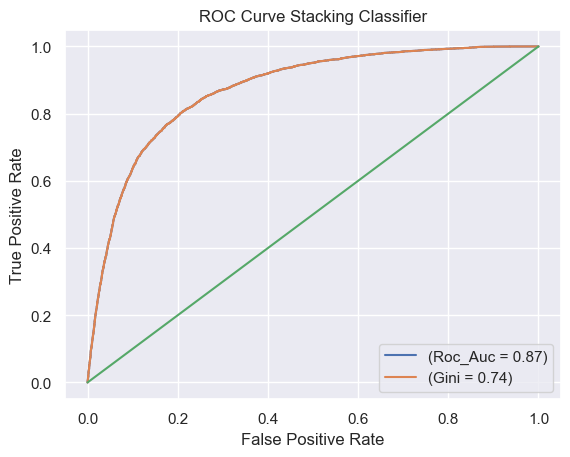

In [71]:
y_prob = stacking_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()